In [33]:
import pandas as pd
import numpy as np
import time
import datetime
from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
import matplotlib.dates as dates

class Data_input:
    def __init__(self, ticker, year1, month1, day1, year2, month2, day2, interval='1d'):
        self.ticker = ticker
        self.period1 = int(time.mktime(datetime.datetime(year1, month1, day1, 23, 59).timetuple()))# 23, 59 are hours and minutes, we want data at the end of dates
        self.period2 = int(time.mktime(datetime.datetime(year2, month2, day2, 23, 59).timetuple()))
        self.interval = interval # Also could be '1wk' or '1mo'
        self.year1 = year1
        self.year2 = year2
        self.month1 = month1
        self.month2 = month2
        self.day1 = day1
        self.day2 = day2

    def Stock(self):
        query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{self.ticker}?period1={self.period1}&period2={self.period2}&interval={self.interval}&events=history&includeAdjustedClose=true'
        return pd.read_csv(query_string)
    def Returns(self):
        df = self.Stock()
        df = df.set_index('Date')
        df["Returns"] = df["Adj Close"].pct_change()
        return df[:datetime.datetime(self.year2, self.month2, self.day2).strftime("%Y-%m-%d")]

In [34]:
ticker, year1, month1, day1, year2, month2, day2 = '^RUA', 2015, 1, 1, 2022, 1, 1
Russel = Data_input(ticker, year1, month1, day1, year2, month2, day2).Returns()
IWV = Data_input('IWV', year1, month1, day1, year2, month2, day2).Returns()
Russel['Volume'] = IWV['Volume']#We use iShares Russell 3000 ETF(IWV) volume because Russel 3000 is not traded
Russel = Russel.dropna()
Russel

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2015-01-05,1219.310059,1219.310059,1199.439941,1201.560059,1201.560059,1135400,-0.017772
2015-01-06,1203.380005,1206.229980,1183.729980,1190.050049,1190.050049,1368000,-0.009579
2015-01-07,1194.609985,1205.319946,1194.609985,1204.000000,1204.000000,360300,0.011722
2015-01-08,1208.729980,1226.140015,1208.729980,1225.260010,1225.260010,489000,0.017658
2015-01-09,1226.329956,1226.339966,1211.329956,1215.069946,1215.069946,417500,-0.008317
...,...,...,...,...,...,...,...
2021-12-27,2769.340088,2803.879883,2769.340088,2803.739990,2803.739990,222700,0.012780
2021-12-28,2803.899902,2813.590088,2795.709961,2798.350098,2798.350098,170000,-0.001922
2021-12-29,2798.379883,2807.370117,2791.860107,2801.870117,2801.870117,242200,0.001258


In [35]:
test = Russel[Russel.index >= '2019'] 
train = Russel[Russel.index < '2019']
train

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2015-01-05,1219.310059,1219.310059,1199.439941,1201.560059,1201.560059,1135400,-0.017772
2015-01-06,1203.380005,1206.229980,1183.729980,1190.050049,1190.050049,1368000,-0.009579
2015-01-07,1194.609985,1205.319946,1194.609985,1204.000000,1204.000000,360300,0.011722
2015-01-08,1208.729980,1226.140015,1208.729980,1225.260010,1225.260010,489000,0.017658
2015-01-09,1226.329956,1226.339966,1211.329956,1215.069946,1215.069946,417500,-0.008317
...,...,...,...,...,...,...,...
2018-12-20,1472.170044,1473.369995,1433.380005,1448.560059,1448.560059,2251500,-0.016044
2018-12-21,1448.560059,1468.290039,1413.670044,1418.060059,1418.060059,2228800,-0.021055
2018-12-26,1384.170044,1449.189941,1379.010010,1449.160034,1449.160034,2274300,0.021931


In [49]:
def signals(Russel):
    Close = Russel['Close']
    Volume= Russel['Volume']

    logDel = np.log(np.array(Russel['High'])) - np.log(np.array(Russel['Low']))#计算每日最高最低价格的对数差值，作为特征状态的一个指标。
    logRet_1 = np.array(np.diff(np.log(Close)))#这个作为后面计算收益使用
    logRet_5 = np.log(np.array(Close[5:])) - np.log(np.array(Close[:-5])) #计算每5日的指数对数收益差，作为特征状态的一个指标。
    logVol_5 = np.log(np.array(Volume[5:])) - np.log(np.array(Volume[:-5])) #计算每5日的指数成交量的对数差，作为特征状态的一个指标。

    logDel = logDel[5:]
    logRet_1 = logRet_1[4:]
    Close = Close[5:]
    Date = pd.to_datetime(Russel.index[5:])

    Signals = np.column_stack([logDel, logRet_5, logVol_5]) 
    # Signals 是特征状态的指标，选择的是
    return Signals, logRet_1, Date, Close
Signals, logRet_1, Date, Close = signals(Russel)
train_signals, train_logRet_1, train_Date, train_Close = signals(train)
test_signals, test_logRet_1, test_Date, test_Close = signals(test)

In [54]:
model = GaussianHMM(n_components = 3, covariance_type = "full", n_iter = 2000).fit(Signals)
hidden_states = model.predict(Signals)
train_model = GaussianHMM(n_components = 3, covariance_type = "full", n_iter = 2000).fit(train_signals)
test_hidden_states = model.predict(test_signals)
hidden_states

In [60]:
plt.figure(figsize=(25, 18)) 
for i in range(3):
    position = (hidden_states==i)
    plt.plot_date(Date[position], Close[position], 'o', label = 'hidden state %d'%i, lw = 2)
    plt.legend(loc = "best")

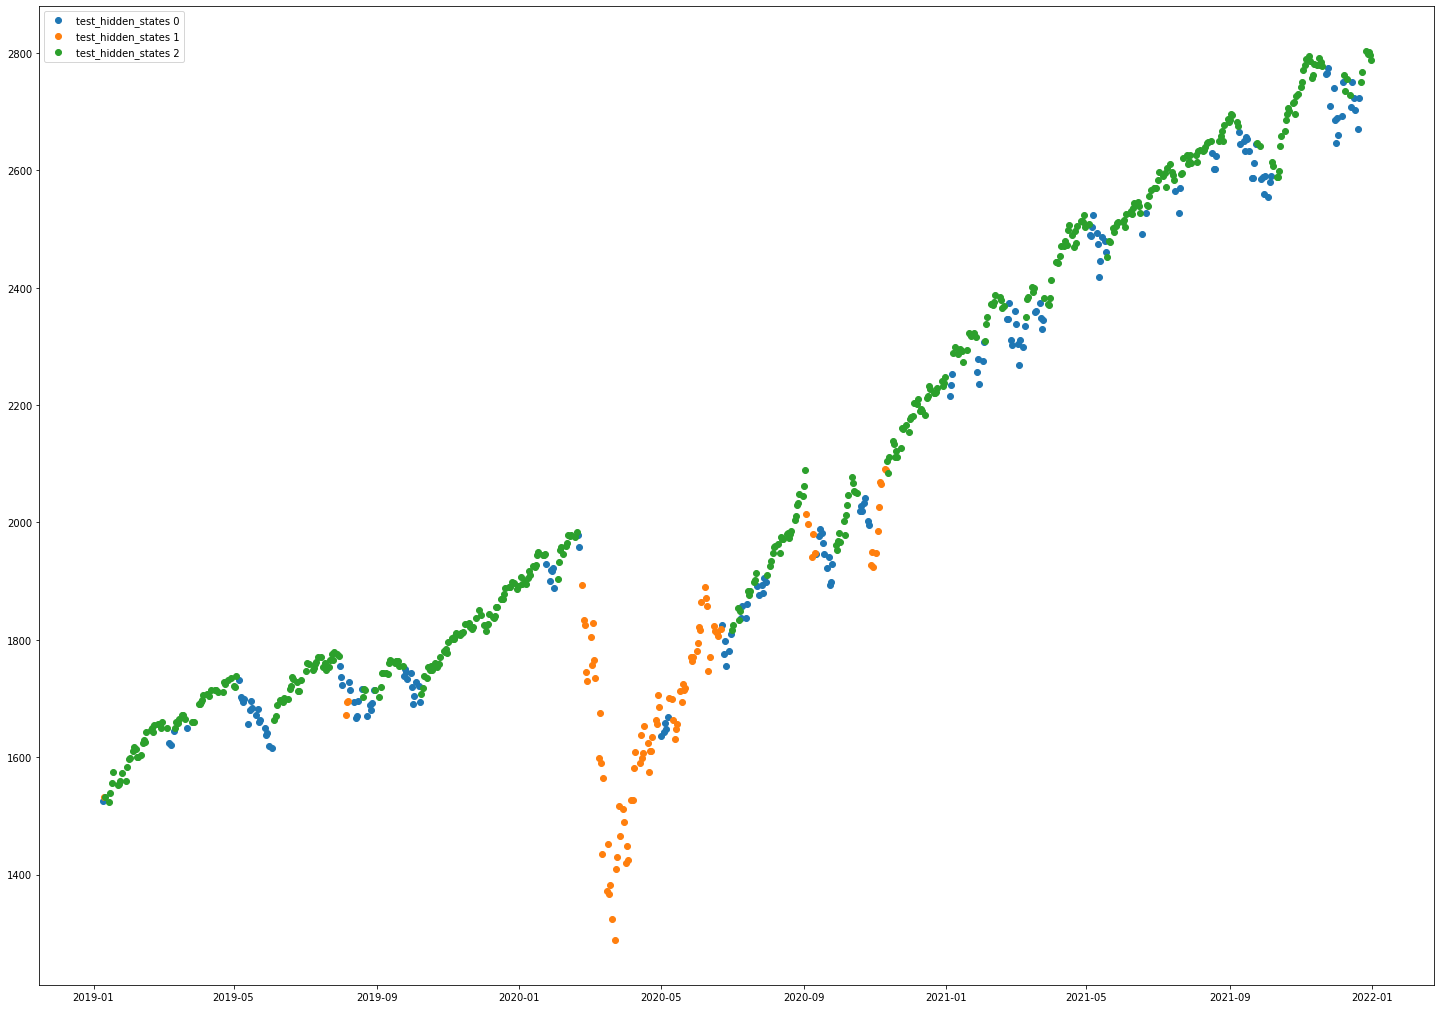

In [61]:
plt.figure(figsize=(25, 18)) 
for i in range(3):
    position = (test_hidden_states==i)
    plt.plot_date(test_Date[position], test_Close[position], 'o', label = 'test_hidden_states %d'%i, lw=2)
    plt.legend(loc = "best")

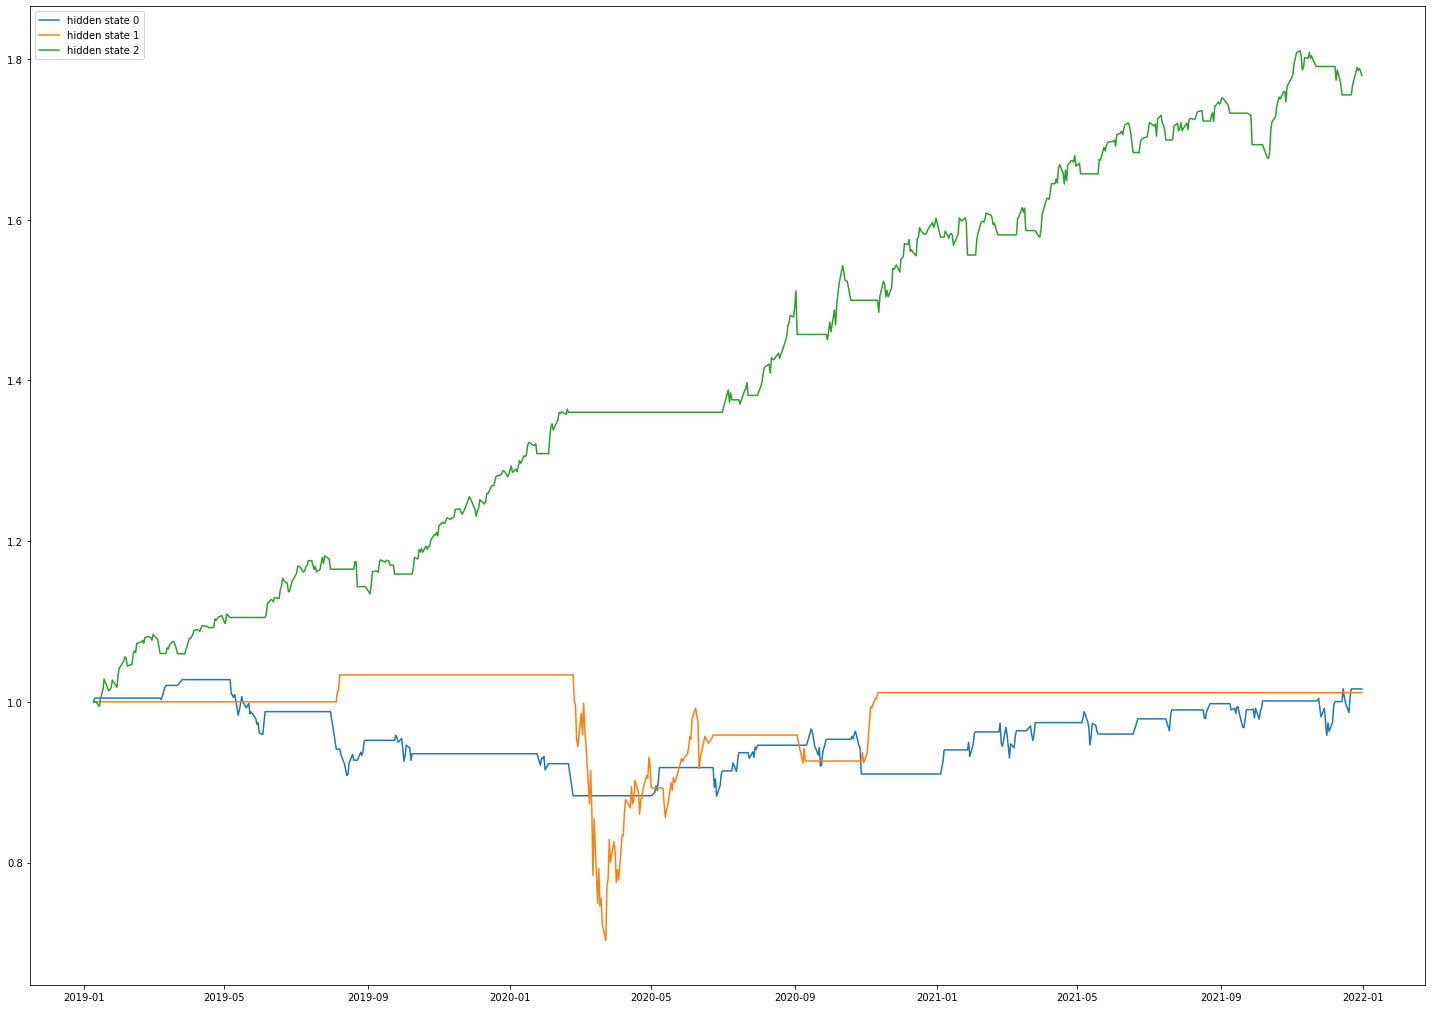

In [66]:
res = pd.DataFrame({'Date':test_Date, 'logRet_1':test_logRet_1, 'state':test_hidden_states}).set_index('Date')
plt.figure(figsize=(25, 18)) 
for i in range(3):
    position = (test_hidden_states==i)
    position = np.append(0, position[:-1])#第二天进行买入操作
    df = res['logRet_1']
    res['state_ret%s'%i] = df.multiply(position)
    plt.plot_date(test_Date, np.exp(res['state_ret%s'%i].cumsum()),'-', label='hidden state %d'%i)
    plt.legend(loc = "best")

In [69]:
#隐藏状态1是一个明显的大牛市阶段，
#隐藏状态2是一个震荡下跌的阶段(可能对应反弹)
#隐藏状态0对应大幅下跌。
#由于股指期货可以做空，我们可以进行如下操作：
#   当处于状态1时第二天做多，当处于状态0第二天做空，状态2则不持有。
long = (test_hidden_states==2) #做多
short = (test_hidden_states==1) #做空
long = np.append(0, long[:-1]) #第二天才能操作
short = np.append(0, short[:-1]) #第二天才能操作

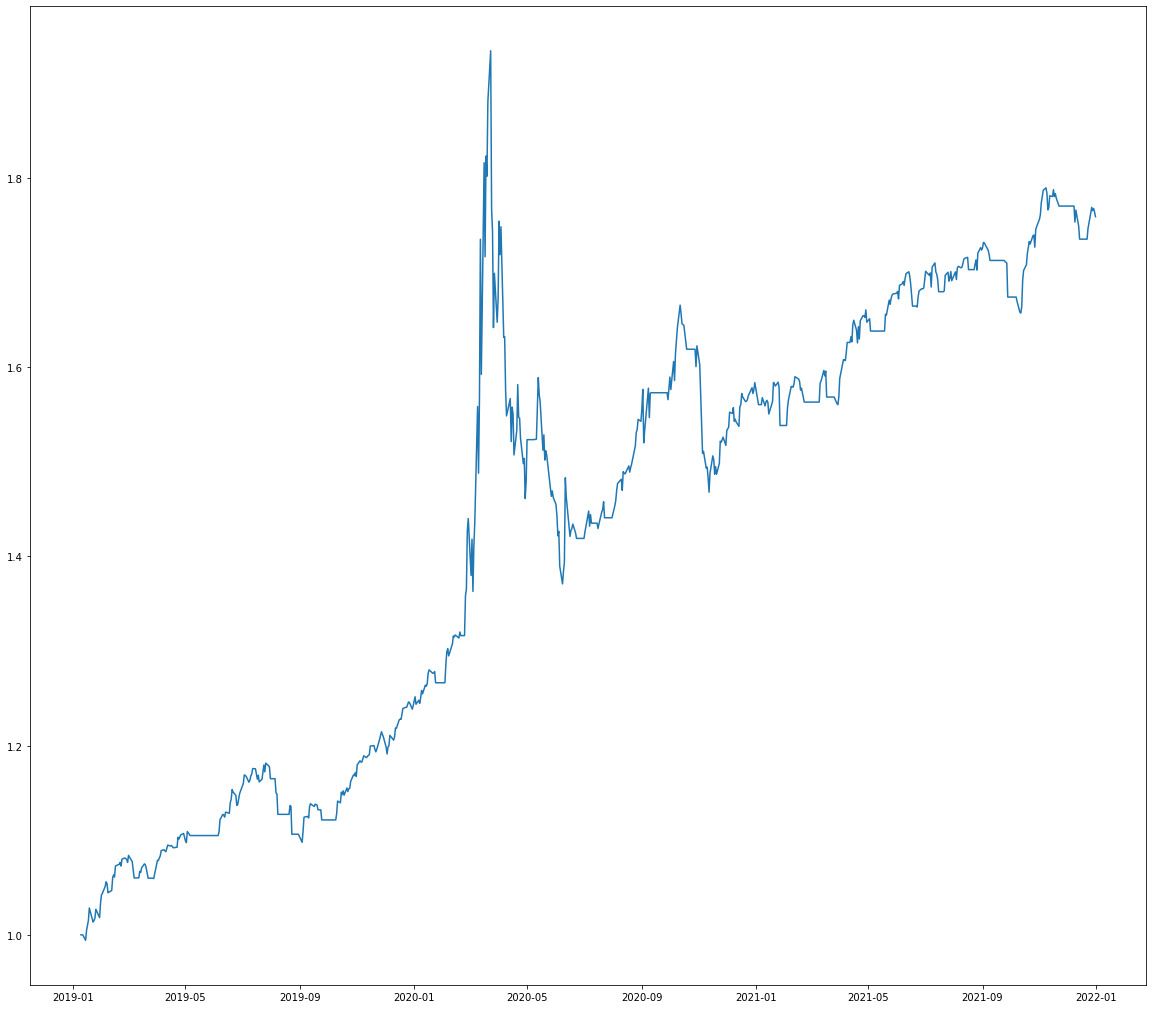

In [70]:
res['ret'] = df.multiply(long) - df.multiply(short)  
fig, ax = plt.subplots(1, 1, figsize = (20,18))
ax.plot_date(test_Date, np.exp(res['ret'].cumsum()),'')

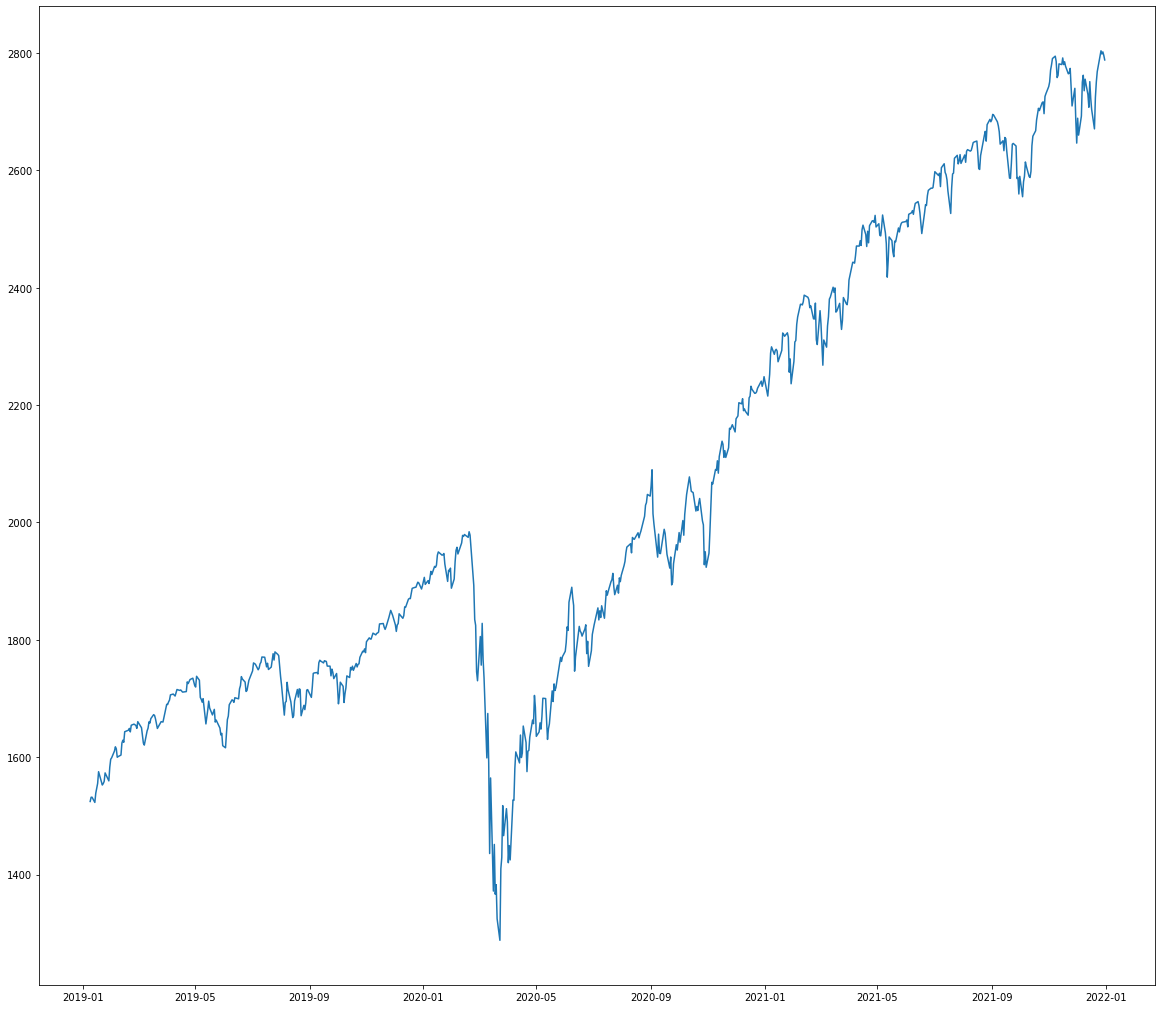

In [77]:
fig, ax = plt.subplots(1, 1, figsize = (20,18))
ax.plot_date(test_Date, test['Adj Close'][5:],'')